### Student Information
Name: 吳文婷        

Student ID:d301111002   

GitHub ID:Jillwu0506

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [68]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Take Home Exercise in Lab 1 Master**

In [69]:
import pandas as pd
import numpy as np
import nltk
import helpers.data_mining_helpers as dmh
import re
import seaborn as sns
import matplotlib.pyplot as plt
import PAMI


In [70]:

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [71]:
#calculate the number of documents in each category
category_counts = X['category_name'].value_counts()
print(category_counts)

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


### >>> **Exercise 5 (take home)**

In [14]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


**Answer:**  
A: nan in numpy means missing value  
B: missing value  
C: string 'NaN' (not missing value)  
D: string 'None'(not missing value)  
E: None means missing value in python  
F: empty string (not missing value)

### >>> **Exercise 6 (take home):**

In [72]:
X_sample = X.sample(n=1000) #random state

# calculate the distribution of categories
category_counts = X['category_name'].value_counts()
category_counts_sample = X_sample['category_name'].value_counts()
category_distribution = category_counts / category_counts.sum()
category_distribution_sample = category_counts_sample / category_counts_sample.sum()

print(category_counts / category_counts.sum())
print(category_counts_sample / category_counts_sample.sum())

category_name
soc.religion.christian    0.265397
sci.med                   0.263181
comp.graphics             0.258751
alt.atheism               0.212672
Name: count, dtype: float64
category_name
soc.religion.christian    0.299
sci.med                   0.255
comp.graphics             0.246
alt.atheism               0.200
Name: count, dtype: float64


**Answer:**
 The distribution of categories in X_sample is similar to the X**


### >>> **Exercise 8 (take home):** 


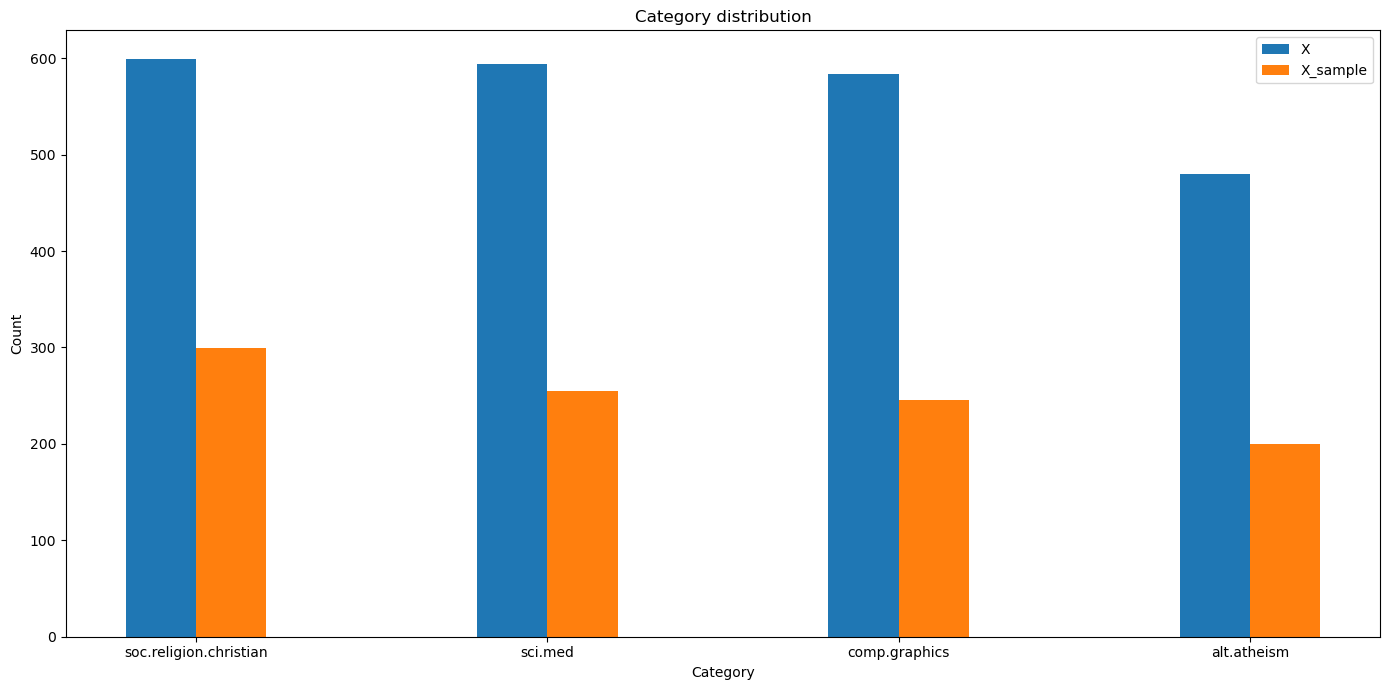

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# combine the category counts in X and X_sample
combined_df = pd.DataFrame({
    'Category': category_counts.index,
    'X': category_counts.values,
    'X_sample': category_counts_sample.reindex(category_counts.index).fillna(0).values
})

# draw the bar chart
plt.figure(figsize=(14, 7))
bar_width = 0.2
index = range(len(combined_df))

plt.bar(index, combined_df['X'], bar_width, label='X')
plt.bar([i + bar_width for i in index], combined_df['X_sample'], bar_width, label='X_sample')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category distribution')
plt.xticks([i + bar_width / 2 for i in index], combined_df['Category'])
plt.legend()

plt.tight_layout()
plt.show()


In [74]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

### **>>> Exercise 10 (take home):**

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

analyze = count_vect.build_analyzer()
analyze(X.text[0])
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [76]:
# grab the first row of the document-term matrix and convert it to a list
feature_names = count_vect.get_feature_names_out()

#Find the '1' in fifth_record and get the corresponding word
fifth_record = X_counts[4].toarray()[0]  
indices = [i for i, x in enumerate(fifth_record) if x == 1]

# get the words corresponding to the indices
words = [feature_names[i] for i in indices]
print(words)

['00', '01', '14', '15', '22', '22824', '28246', '41', '57', 'am', 'at', 'attend', 'believe', 'brother', 'certain', 'chose', 'christ', 'columbia', 'columbiasc', 'corp', 'customary', 'decision', 'died', 'elder', 'equalivant', 'fc', 'find', 'fnal', 'from', 'given', 'go', 'gov', 'grok11', 'heaven', 'highways', 'his', 'hmmmmmm', 'hp', 'hpfcso', 'invite', 'it', 'king', 'kingdom', 'lines', 'made', 'main', 'many', 'marriage', 'matt', 'odds', 'on', 'one', 'organization', 'provided', 'put', 're', 'refused', 'rexlex', 'righteousness', 'sc', 'shrum', 'sins', 'so', 'son', 'sounds', 'subject', 'tells', 'that', 'then', 'theology', 'there', 'therefore', 'unto', 'wear', 'when', 'who', 'writes', 'you', 'your']


**# Answer:**
 The word of second '1' is '01' and we also know all words having '1' in fifth_record.

### **>>> Exercise 11 (take home):** 


C:\Users\jill\AppData\Local\Temp\ipykernel_31796\1062165154.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')


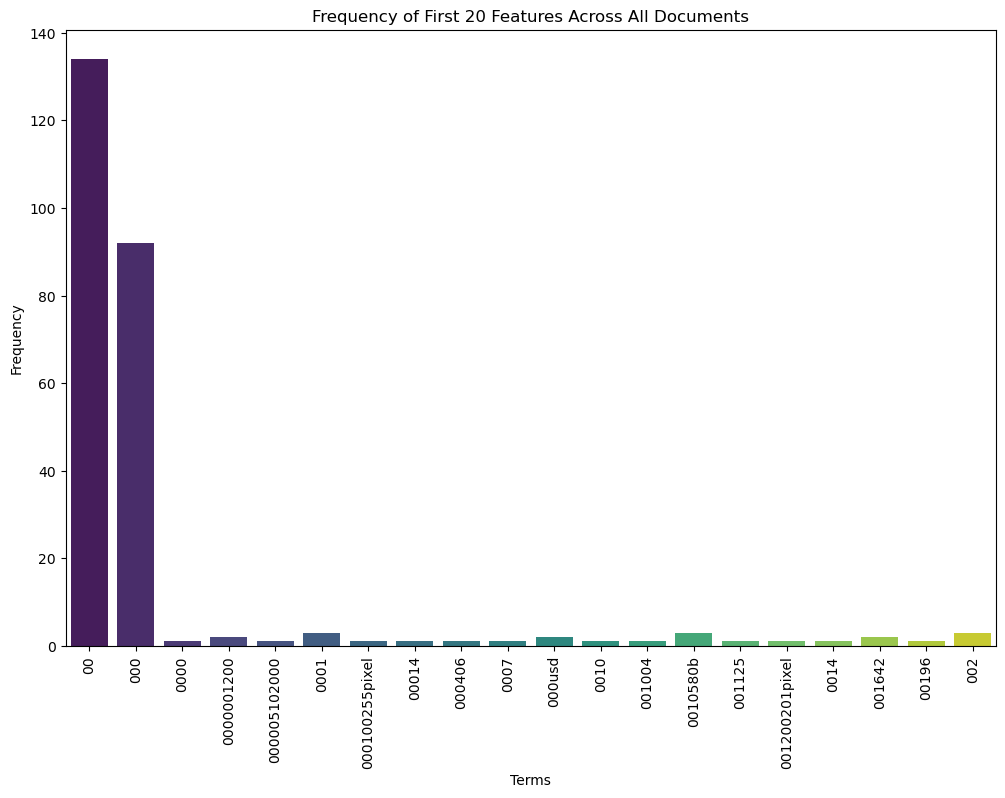

In [20]:
import seaborn as sns
# Only select the first 20 features
selected_features = feature_names[:20]

# Get the document term matrix
X_counts_selected = X_counts[:, :20].toarray()

# Create a dataframe for seaborn plot
df_todraw = pd.DataFrame(X_counts_selected, columns=selected_features)

# Count the frequency of each word
feature_counts = df_todraw.sum(axis=0)

# draw the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette='viridis')
plt.title('Frequency of First 20 Features Across All Documents')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### >>> **Exercise 12 (take home):**

In [21]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [22]:
import plotly.express as px

# count the frequency of each term
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# plot the frequency of the first 300 features
fig = px.bar(df_todraw, x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300], title='Frequency of Frist 300 Features')
fig.update_layout(xaxis_title='Terms', yaxis_title='Frequency', xaxis_tickangle=-90, width=1500, height=800)
fig.show()

### >>> **Exercise 13 (take home):** 

In [23]:
# Create a dataframe for sorting the top 20 features
df = pd.DataFrame({'Term': count_vect.get_feature_names_out(), 'Frequency': term_frequencies})
df_sorted = df.sort_values(by='Frequency', ascending=False).head(20)

# plot the frequency of the top 20 features
fig = px.bar(df_sorted, x='Term', y='Frequency', title='Top 20 Features by Frequency')
fig.update_layout(xaxis_title='Terms', yaxis_title='Frequency', xaxis_tickangle=-45)
fig.show()

### >>> **Exercise 14 (take home):** 

C:\Users\jill\AppData\Local\Temp\ipykernel_31796\168842232.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

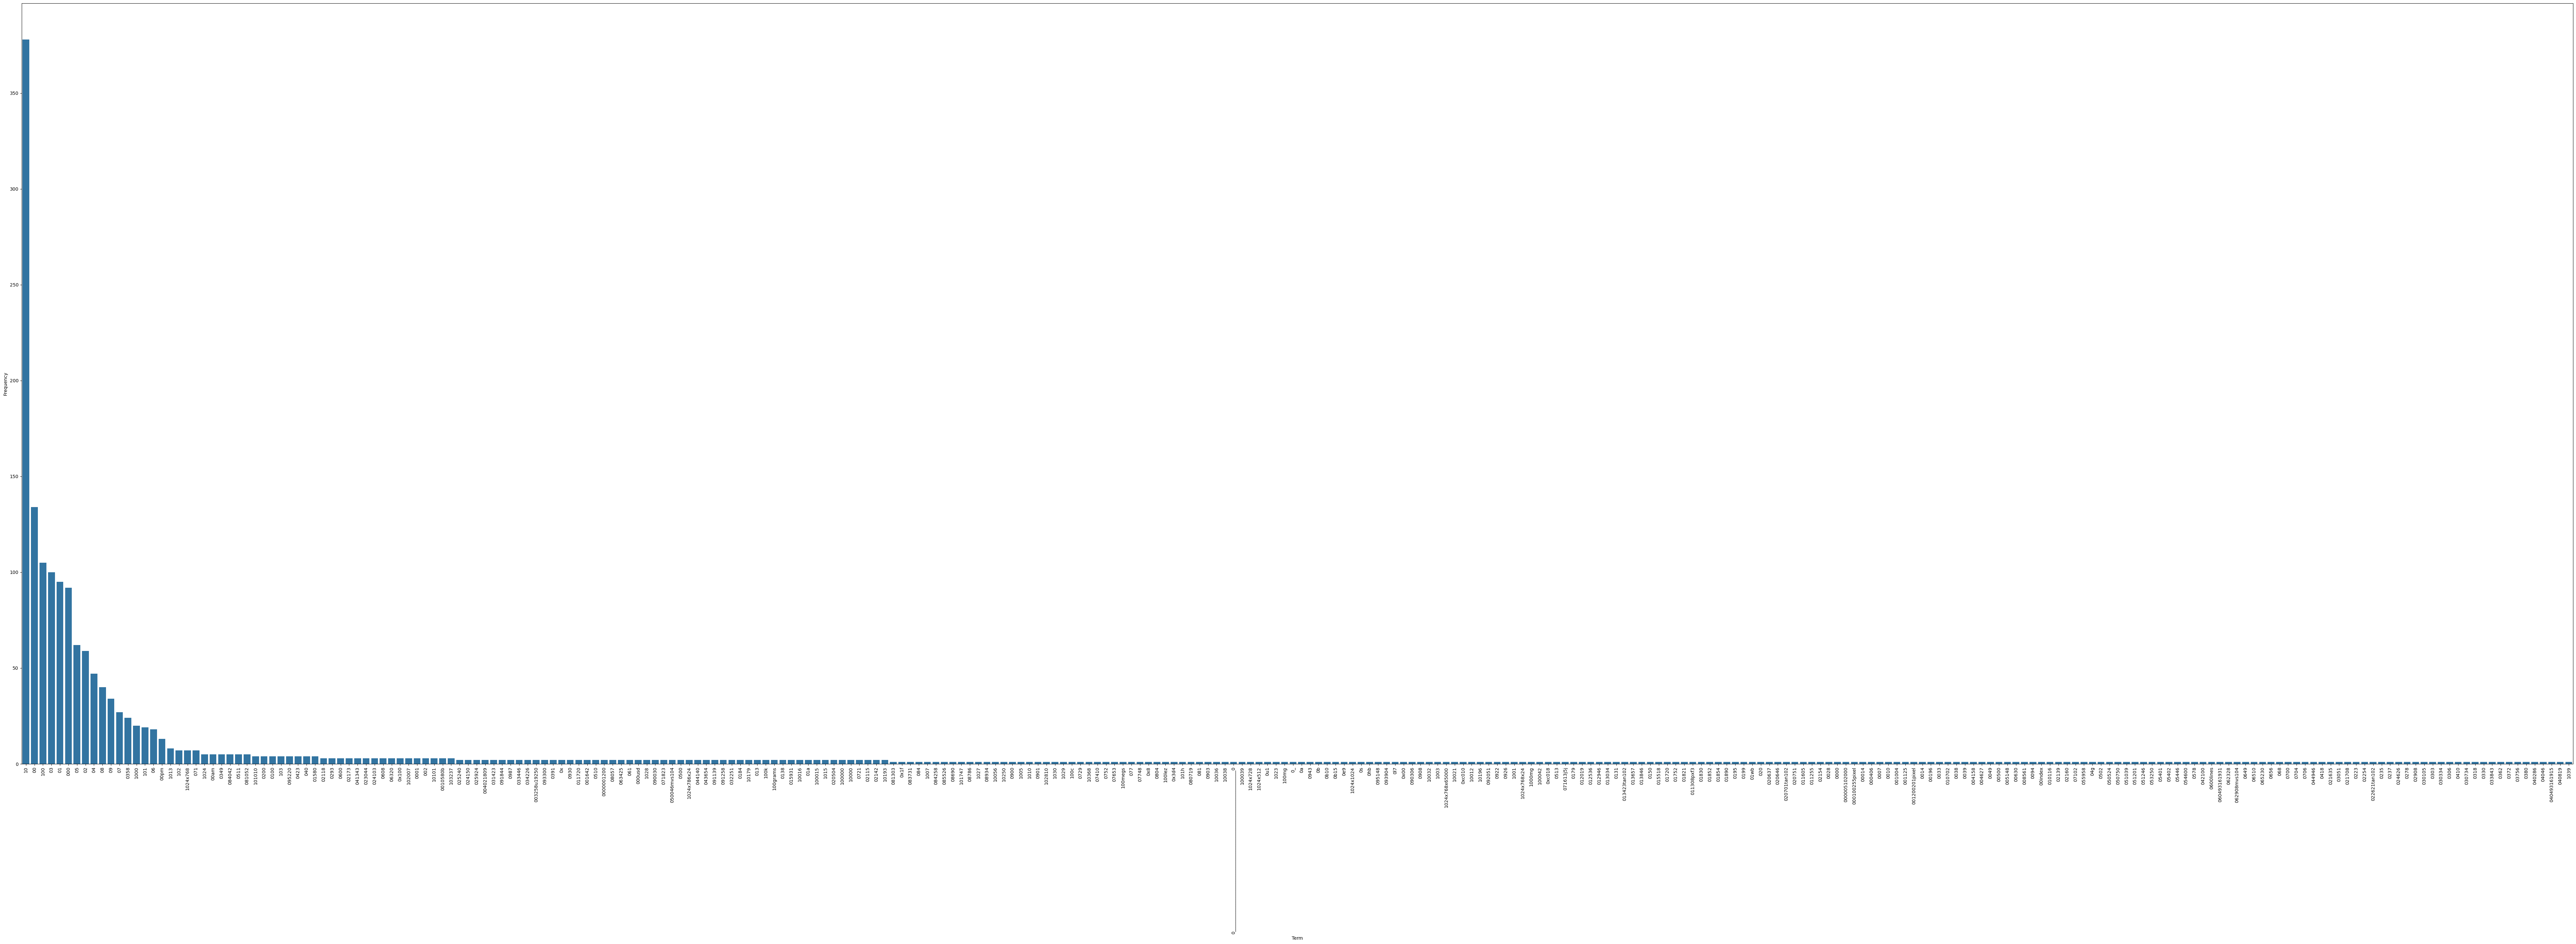

In [24]:
# Create a dataframe for sorting the first 300 features
df = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:300], 'Frequency': term_frequencies[:300]})
df_sorted = df.sort_values(by='Frequency', ascending=False)

# plot the frequency of the first 300 features
plt.subplots(figsize=(100, 30))
g = sns.barplot(x='Term', y='Frequency', data=df_sorted)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


### >>> **Exercise 15 (take home):** 


C:\Users\jill\AppData\Local\Temp\ipykernel_31796\3260780071.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

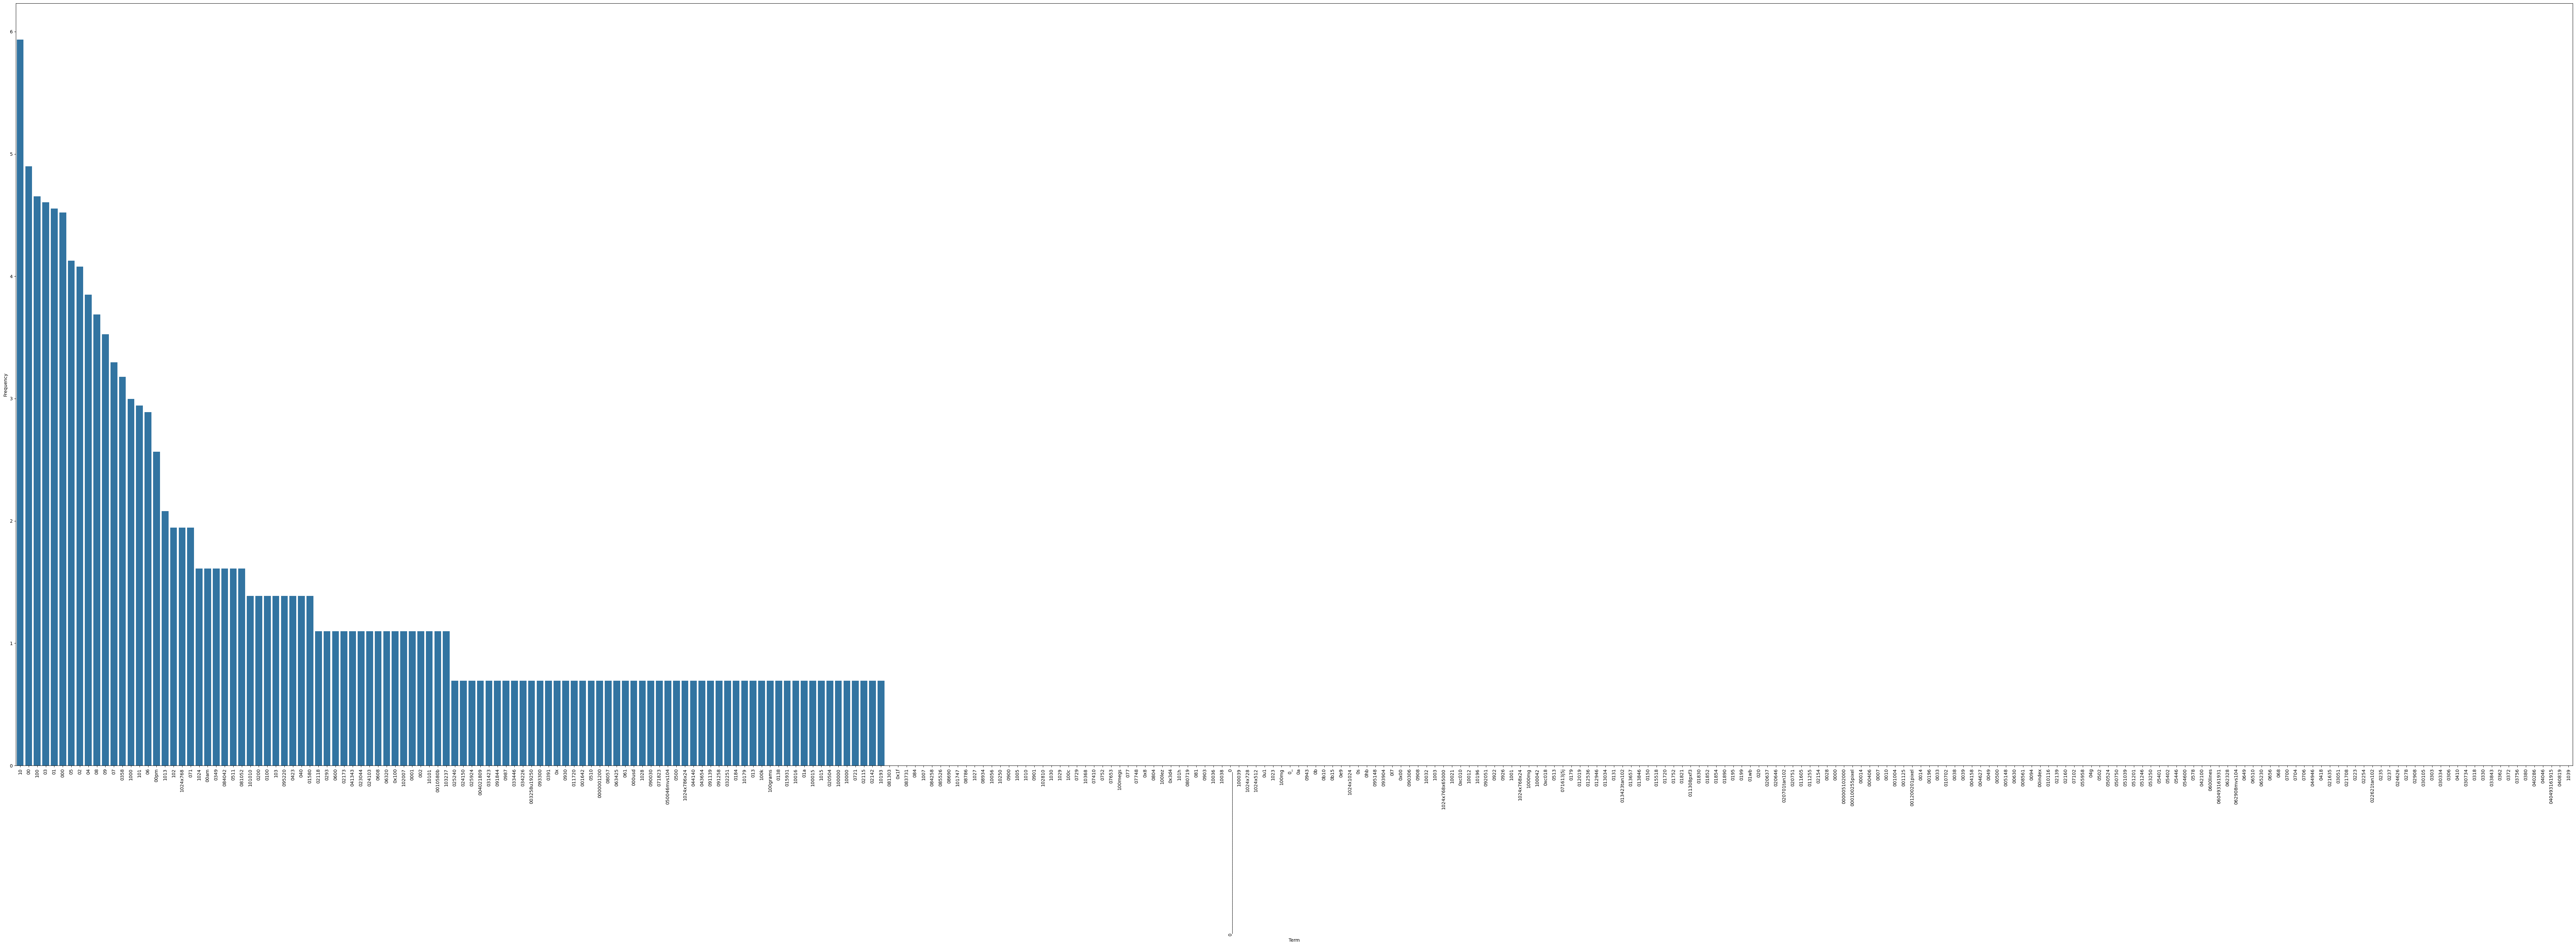

In [25]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Create a dataframe for sorting the first 300 features using log 
df = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:300], 'Frequency': term_frequencies_log[:300]})
df_sorted = df.sort_values(by='Frequency', ascending=False)

# plot the frequency of the first 300 features
plt.subplots(figsize=(100, 30))
g = sns.barplot(x='Term', y='Frequency', data=df_sorted)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

**Answer**  
Using term_frequencies_log instead of raw frequencies to plot the chart can reduce the disparity between high-frequency and low-frequency terms, making the chart more balanced and readable.
  
Log frequencies also can help identify terms that are not prominent in raw frequencies but are still important in specific contexts.  

### >>> **Exercise 16 (take home):** 


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [27]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category comp.graphics:


,00,000,000005102000,000100255pixel,0007,000usd,0010580b,001200201pixel,00196,002,...,zorn,zrz,zsoft,zt,zug,zurich,zvi,zyeh,zyxel,ªl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category alt.atheism we filter the following words:
Bottom 1.0% words: 
zyklon          1
plagerize       1
disqualified    1
disproving      1
disproven       1
               ..
dressed         1
perfecetly      1
donate          1
dregs           1
dreams          1
Length: 119, dtype: int64
Top 5.0% words: 
court      36
lot        37
among      37
days       37
three      37
         ... 
that     3158
is       3530
to       4249
of       4253
the      7234
Length: 598, dtype: int64

For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            

,00,000,000406,001125,01,0100,010116,011255,012536,013034,...,zip,zlumber,zombie,zoo,zues,zumder,zur,zurlo,zus,zvonko
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Answer:**  
Number of Bottom 1.0% words:  
    comp.graphics:137  
    soc.religion.christian:138  
    sci.med:162  
    alt.atheism:119  
Number of Top 5.0% words:  
    comp.graphics:687   
    soc.religion.christian:693  
    sci.med:812  
    alt.atheism:598  

The first four most frequently occurring words are all the same in all four groups.('the', 'to', 'of', 'and')

### >>> **Exercise 17 (take home):** 

In [77]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


In [78]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj_FPGrowth = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj_FPGrowth.mine()
frequentPatternsDF_comp_graphics_FPGrowth= obj_FPGrowth.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics_FPGrowth))) #print the total number of patterns
print('Runtime: ' + str(obj_FPGrowth.getRuntime())) #measure the runtime

obj_FPGrowth.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics_FPGrowth

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.12081074714660645


,Patterns,Support
0,lots,9
1,ee,9
2,class,9
3,moment,9
4,newer,9
...,...,...
33569,life,24
33570,ideas,24
33571,tried,24
33572,feel,24


**Answer:**

- FAE Top-K 

In [82]:
# Import the FAE algorithm from the PAMI library
from PAMI.frequentPattern.topk import FAE  as alg

#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
minimumSupportCountList = [500, 1000, 1500]
seperator='\t'


In [83]:
#mine the patterns for each minimum support count
algorithm = 'FAE'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj_FAE = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=minSupCount, sep=seperator)
    obj_FAE.mine()
    var_name = f'frequentPatternsDF_comp_graphics_FAE_{minSupCount}'
    globals()[var_name] = obj_FAE.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(globals()[var_name]))) #print the total number of patterns
    print('Runtime: ' + str(obj_FAE.getRuntime())) #measure the runtime
    obj_FAE.save(f'freq_patterns_comp_graphics_FAE_{minSupCount}.txt') #save the patterns
    globals()[var_name]

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.8801627159118652
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 1.8885762691497803
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 4.203075170516968


In [84]:
frequentPatternsDF_comp_graphics_FAE_500

,Patterns,Support
0,maybe,26
1,life,24
2,ideas,24
3,tried,24
4,feel,24
...,...,...
495,awful posts favor concerning proposed learn fo...,12
496,posts favor concerning proposed learn forum pe...,12
497,convenience posts favor concerning proposed le...,12
498,posts favor concerning proposed learn forum pe...,12


In [85]:
frequentPatternsDF_comp_graphics_FAE_1000

,Patterns,Support
0,maybe,26
1,life,24
2,ideas,24
3,tried,24
4,feel,24
...,...,...
995,curious proposed forum personally feel wate,12
996,proposed forum personally feel curious,12
997,convenience awful discussing posts favor conce...,12
998,awful discussing posts favor concerning propos...,12


In [86]:
frequentPatternsDF_comp_graphics_FAE_1500

,Patterns,Support
0,maybe,26
1,life,24
2,ideas,24
3,tried,24
4,feel,24
...,...,...
1495,awful discussing curious proposed learn person...,12
1496,discussing curious proposed learn personally f...,12
1497,convenience discussing curious proposed learn ...,12
1498,discussing curious proposed learn personally f...,12


- MaxFPGrowth

In [87]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm

#Specify the input parameters
minimumSupportCountList = [3, 6, 9]
seperator='\t'

In [88]:
for minSupCount in minimumSupportCountList:
    obj_MaxFPGrowth = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSupCount, sep=seperator)
    obj_MaxFPGrowth.mine()
    var_name = f'frequentPatternsDF_comp_graphics_MaxFPGrowth_{minSupCount}'
    globals()[var_name] = obj_MaxFPGrowth.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(globals()[var_name]))) #print the total number of patterns
    print('Runtime: ' + str(obj_MaxFPGrowth.getRuntime())) #measure the runtime
    obj_MaxFPGrowth.save(f'freq_patterns_comp_graphics_MaxFPGrowth_{minSupCount}.txt') #save the patterns
    globals()[var_name]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6872
Runtime: 16.970963954925537
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 1340
Runtime: 0.23371291160583496
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.10034418106079102


In [184]:
frequentPatternsDF_comp_graphics_MaxFPGrowth_3

,Patterns,Support
0,due bytes responsible 000 opinion 640x480 rob ...,3
1,bag,3
2,garbo uwasa,3
3,wrong 200 responsible 000 umn 480 640 tc,3
4,responsible 000 essex,3
...,...,...
6867,didn wondering,3
6868,feel wrong personally,3
6869,wrong correct,3
6870,life correct,3


In [185]:
frequentPatternsDF_comp_graphics_MaxFPGrowth_6

,Patterns,Support
0,tim brock,6
1,face,6
2,pardon,6
3,removal silent assassin cellar tsa,6
4,creative,6
...,...,...
1335,feel apr,8
1336,didn,22
1337,wrong,23
1338,tried,24


In [186]:
frequentPatternsDF_comp_graphics_MaxFPGrowth_9

,Patterns,Support
0,tim,9
1,option,9
2,rumours 68070,9
3,chip,9
4,rumours mcmains unt,9
...,...,...
655,wrong,23
656,tried,24
657,ideas,24
658,life,24


- Compare the patterns extracted from these algorithms  
**Result**  
MaxFPGrowth: The number of extracted patterns and running time vary with changes in minimum support. The lower the support, the more patterns are extracted and the longer the running time.  
FAE Top-K: The number of extracted patterns is fixed at the K value. The larger the K value, the longer the running time.  
FPGrowth: The number of extracted patterns and running time vary with changes in minimum support. The lower the support, the more patterns are extracted and the longer the running time.  
**Findings**  
Running Time: MaxFPGrowth has the shortest running time when the threshold is set to 9.  
Comparing the top 5 patterns extracted by each algorithm: MaxFPGrowth and FAE Top-K both yield the same patterns: 'maybe', 'tried', 'life', 'ideas', 'feel'.  
It can be concluded that FPGrowth focuses on comprehensive frequent itemset mining, MaxFPGrowth targets maximal frequent itemsets, and FAE Top-K aims for the rapid extraction of the most common K itemsets.

### >>> **Exercise 18 (take home):**

- To get tdm and augmented_df 

In [89]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.19056105613708496
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.18856287002563477
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.12253308296203613
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.23056244850158691


In [90]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                   Patterns  Support
19912                                   gov       33
19911                             institute       33
57158                               snm6394       32
19910                                  form       31
19909                                    08       30
...                                     ...      ...
54033  soc princeton al et boy scouts motss        9
54032  boy axes funds matching scouts motss        9
54031   et axes funds matching scouts motss        9
54030    et boy funds matching scouts motss        9
0                            pl8 newsreader        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [91]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,soc princeton al boy funds scouts motss,soc princeton al et matching scouts motss,et boy axes matching scouts motss,soc princeton al et funds scouts motss,soc princeton al et axes scouts motss,soc princeton al et boy scouts motss,boy axes funds matching scouts motss,et axes funds matching scouts motss,et boy funds matching scouts motss,pl8 newsreader
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Answer:**

In [98]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

In [93]:
#Applying dimensionality reduction ot 3 with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

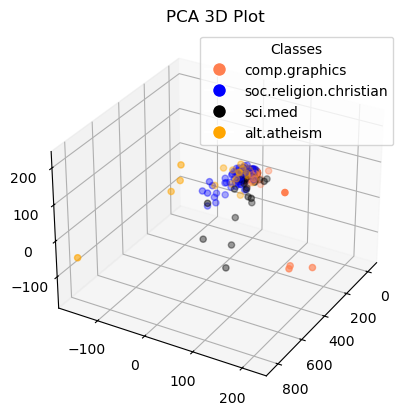

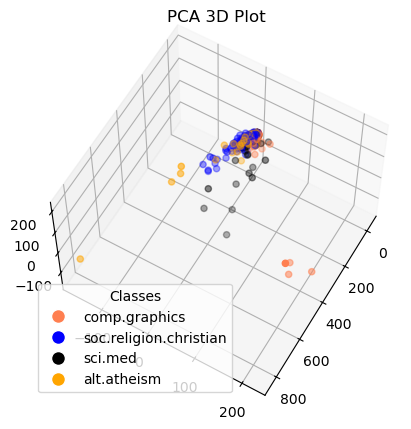

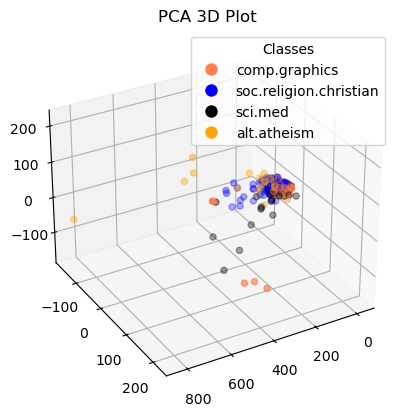

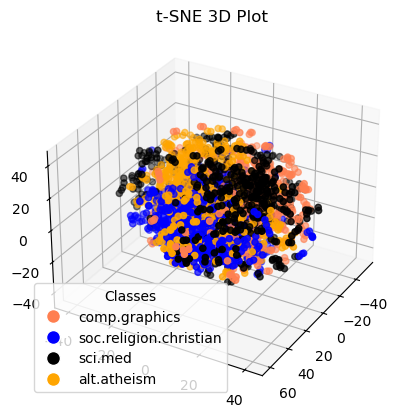

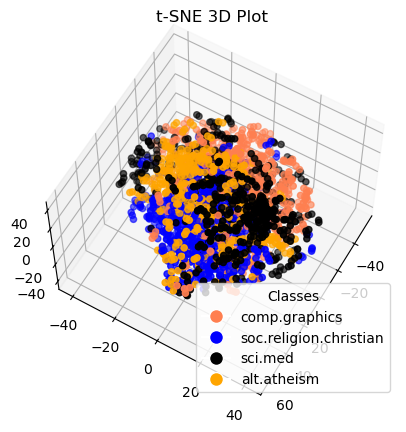

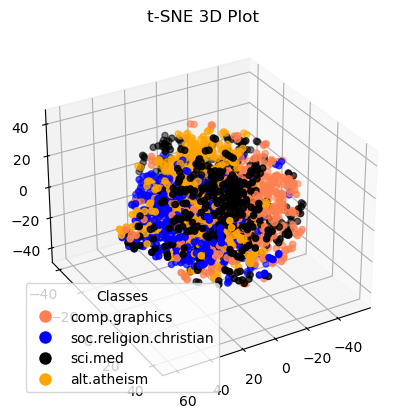

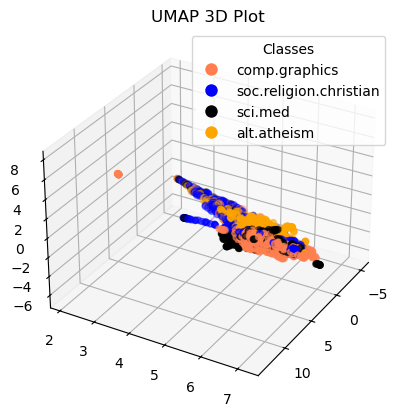

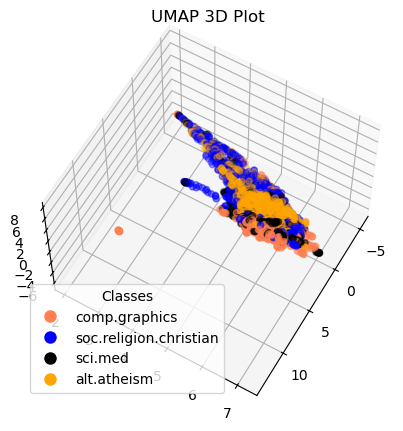

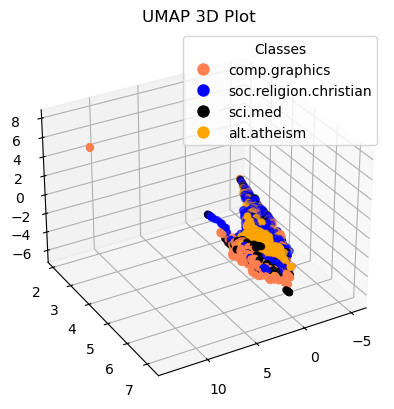

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import pandas as pd

# Define the color map for each category
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()
color_map = {category: col[i % len(col)] for i, category in enumerate(categories)}
labels = X['category_name'].map(color_map).values

# Applying dimensionality reduction to 3 components
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# define a function to plot 3D data
def plot_3d(data, labels, title, angle1, angle2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, marker='o')
    ax.set_title(title)
    ax.view_init(angle1, angle2)
    
    # Create a custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[cat], markersize=10) for cat in categories]
    ax.legend(handles, categories, title="Classes")
    
    plt.show()

# draw the 3D plot for PCA, t-SNE, and UMAP
plot_3d(X_pca_aug, labels, 'PCA 3D Plot', 30, 30)
plot_3d(X_pca_aug, labels, 'PCA 3D Plot', 60, 30)
plot_3d(X_pca_aug, labels, 'PCA 3D Plot', 30, 60)

plot_3d(X_tsne_aug, labels, 't-SNE 3D Plot', 30, 30)
plot_3d(X_tsne_aug, labels, 't-SNE 3D Plot', 60, 30)
plot_3d(X_tsne_aug, labels, 't-SNE 3D Plot', 30, 60)

plot_3d(X_umap_aug, labels, 'UMAP 3D Plot', 30, 30)
plot_3d(X_umap_aug, labels, 'UMAP 3D Plot', 60, 30)
plot_3d(X_umap_aug, labels, 'UMAP 3D Plot', 30, 60)

### >>> **Exercise 19 (take home):**

In [105]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)

X['bin_category'] = mlb.transform(X['category_name']).tolist()

X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{London,, 0HB., Nntp-Posting-Host:, know, Univ...","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","{human,, as, whole, know, Math, inside, Univer...","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{(check, an, use, effectively, esteem., find, ...","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{Masja,, Most, me, I'm, Hello,, the, schools,,...","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{22:9-14, as, ""refused"", many, >In, feast.'......","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","{>Christians, Indeed,, As, such, boss, medical...","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","{are,, As, dealt, such, as, know, about, He, m...","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","{>is, till, an, as, whitehead, alone, -Jackie-...","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","{contrary, RGB., >In, Organization:, case,, On...","[0, 0, 0, 0]"


**Answer:**  
Not working

## **Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data**

               precision    recall  f1-score   support

    nostalgia       0.73      0.97      0.84       152
not nostalgia       0.95      0.64      0.77       148

     accuracy                           0.81       300
    macro avg       0.84      0.80      0.80       300
 weighted avg       0.84      0.81      0.80       300



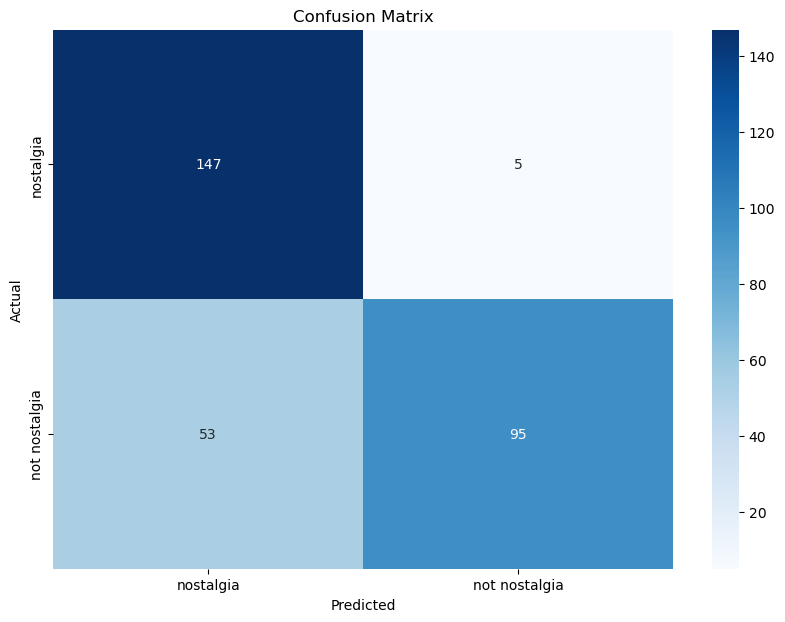

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 讀取數據
data = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')  # 替換為你的數據集路徑
texts = data['comment']
labels = data['sentiment']

# 2. 預處理文本數據
# 這裡假設文本數據已經過基本清理

# 3. 使用 TF-IDF 提取特徵
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(texts)

# 4. 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 5. 訓練 Naive Bayes 分類器
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 6. 預測測試集
y_pred = nb_classifier.predict(X_test)

# 7. 評估結果
print(classification_report(y_test, y_pred))

# 8. 視覺化結果
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 1. The Data

## 2. Data Preparation


## 3. Data Transformation

## 4. Data Mining using Pandas